# Extended event studies examples

In [1]:
# Add BipartitePandas to system path, do not run this
import sys
sys.path.append('../../..')

In [2]:
# Import the BipartitePandas package 
# (Make sure you have installed it using pip install bipartitepandas)
import bipartitepandas as bpd

In [3]:
# For the example, we simulate bipartite labor data
sim_data = bpd.SimBipartite().sim_network()
bdf = bpd.BipartiteLong(sim_data)
bdf = bdf.clean_data()
display(bdf)

,i,j,y,t
0,0,179,3.362666,1
1,0,179,2.263588,2
2,0,180,3.609750,3
3,0,191,2.692694,4
4,0,155,0.980481,5
...,...,...,...,...
49995,9999,132,0.237403,1
49996,9999,153,1.853661,2
49997,9999,113,-0.174123,3
49998,9999,177,0.140695,4


### Getting extended event studies

In [4]:
# BipartitePandas allows you to use clustered long data to generate event studies with more than 2 periods
# So first, cluster the data
bdf = bdf.cluster()
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2) # periods_post includes the first period after the transition
display(es_extended)

,i,t,g_l3,g_l2,g_l1,g_f1,g_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,0,4,4,4,4,4,0,3.362666,2.263588,3.609750,2.692694,0.980481
1,2,4,3,3,7,0,0,0.341884,-1.576984,-0.661717,1.784045,1.353745
2,4,4,4,4,0,0,0,1.920454,0.752110,-0.557446,1.454474,0.891493
3,5,4,4,4,4,5,5,2.390740,1.729922,3.081137,1.638379,1.701856
4,9,4,7,5,5,5,5,0.390460,0.875029,-0.201979,-0.588091,-2.541460
...,...,...,...,...,...,...,...,...,...,...,...,...
4947,9993,4,5,5,0,2,6,1.647053,-1.659439,-0.129268,-0.552749,-0.545606
4948,9996,4,0,0,4,0,4,0.068006,3.948459,3.110733,0.995665,2.108055
4949,9997,4,3,3,3,1,4,-1.723358,-0.813841,0.311687,-1.059441,1.458082
4950,9998,4,5,5,5,4,0,1.111962,1.632462,1.058303,2.646609,2.692142


In [5]:
# You can specify which columns to include (by default they are g and y)
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, include=['j', 'y'])
display(es_extended)

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,0,4,179,179,180,191,155,3.362666,2.263588,3.609750,2.692694,0.980481
1,2,4,42,42,86,165,165,0.341884,-1.576984,-0.661717,1.784045,1.353745
2,4,4,178,181,170,138,138,1.920454,0.752110,-0.557446,1.454474,0.891493
3,5,4,191,191,191,131,131,2.390740,1.729922,3.081137,1.638379,1.701856
4,9,4,62,134,134,105,105,0.390460,0.875029,-0.201979,-0.588091,-2.541460
...,...,...,...,...,...,...,...,...,...,...,...,...
4947,9993,4,131,115,154,81,2,1.647053,-1.659439,-0.129268,-0.552749,-0.545606
4948,9996,4,142,164,189,166,188,0.068006,3.948459,3.110733,0.995665,2.108055
4949,9997,4,56,56,56,25,177,-1.723358,-0.813841,0.311687,-1.059441,1.458082
4950,9998,4,105,105,105,194,167,1.111962,1.632462,1.058303,2.646609,2.692142


In [6]:
# You can specify column(s) for stable_pre or stable_post to keep only workers with those columns constant before/after the transition
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, stable_pre='j', stable_post='j', include=['j', 'y'])
display(es_extended)

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,5,4,191,191,191,131,131,2.390740,1.729922,3.081137,1.638379,1.701856
1,14,4,120,120,120,147,147,1.710492,0.121440,0.653152,3.706541,1.321689
2,42,4,86,86,86,166,166,1.293975,-0.293095,0.835745,1.383169,2.925029
3,55,4,108,108,108,3,3,-0.283528,-0.588384,-0.474336,-1.147575,-1.162205
4,61,4,58,58,58,3,3,-1.358366,-1.388048,-1.951850,-4.202014,-1.950912
...,...,...,...,...,...,...,...,...,...,...,...,...
629,9934,4,1,1,1,58,58,-3.572090,-2.432130,-3.323800,-1.198140,-1.228625
630,9943,4,143,143,143,82,82,0.571071,0.227069,0.769423,0.420742,0.100614
631,9954,4,29,29,29,6,6,-0.892195,-1.066855,-1.592862,-0.557421,-1.279140
632,9960,4,53,53,53,81,81,-1.001720,-0.649014,-1.237722,-0.245975,0.594193


In [7]:
# You can specify column(s) for stable_pre or stable_post that aren't included
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, stable_pre='g', stable_post='g', include=['j', 'y'])
display(es_extended)

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,5,4,191,191,191,131,131,2.390740,1.729922,3.081137,1.638379,1.701856
1,14,4,120,120,120,147,147,1.710492,0.121440,0.653152,3.706541,1.321689
2,23,4,24,24,24,81,88,-0.781994,-0.844562,-1.353411,-0.991845,0.711533
3,42,4,86,86,86,166,166,1.293975,-0.293095,0.835745,1.383169,2.925029
4,55,4,108,108,108,3,3,-0.283528,-0.588384,-0.474336,-1.147575,-1.162205
...,...,...,...,...,...,...,...,...,...,...,...,...
1179,9960,4,53,53,53,81,81,-1.001720,-0.649014,-1.237722,-0.245975,0.594193
1180,9965,4,16,16,17,10,10,-1.797143,-1.446441,-2.486519,-1.494567,-4.703085
1181,9966,4,166,166,166,144,141,2.541568,1.241036,1.467707,-0.184194,0.081858
1182,9976,4,66,59,59,76,76,0.708623,1.120112,0.998227,-0.170443,-0.235868


In [8]:
# You can also redefine what column to use to define a transition
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, stable_pre='g', stable_post='j', include=['j', 'g', 'y'], transition_col='g')
display(es_extended)
display(es_extended[es_extended['j_l3'] != es_extended['j_l2']])

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,g_l3,g_l2,g_l1,g_f1,g_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,5,4,191,191,191,131,131,4,4,4,5,5,2.390740,1.729922,3.081137,1.638379,1.701856
1,14,4,120,120,120,147,147,5,5,5,0,0,1.710492,0.121440,0.653152,3.706541,1.321689
2,42,4,86,86,86,166,166,7,7,7,0,0,1.293975,-0.293095,0.835745,1.383169,2.925029
3,55,4,108,108,108,3,3,2,2,2,6,6,-0.283528,-0.588384,-0.474336,-1.147575,-1.162205
4,61,4,58,58,58,3,3,3,3,3,6,6,-1.358366,-1.388048,-1.951850,-4.202014,-1.950912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,9934,4,1,1,1,58,58,6,6,6,3,3,-3.572090,-2.432130,-3.323800,-1.198140,-1.228625
724,9943,4,143,143,143,82,82,0,0,0,2,2,0.571071,0.227069,0.769423,0.420742,0.100614
725,9954,4,29,29,29,6,6,1,1,1,6,6,-0.892195,-1.066855,-1.592862,-0.557421,-1.279140
726,9960,4,53,53,53,81,81,3,3,3,2,2,-1.001720,-0.649014,-1.237722,-0.245975,0.594193


,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,g_l3,g_l2,g_l1,g_f1,g_f2,y_l3,y_l2,y_l1,y_f1,y_f2
5,65,4,118,114,114,193,193,5,5,5,4,4,0.866307,1.919323,0.973270,-0.420337,1.597434
15,164,4,167,142,142,102,102,0,0,0,2,2,0.323947,0.836366,1.716190,0.985614,1.192874
17,223,4,97,126,131,91,91,5,5,5,2,2,1.307975,0.495719,2.330339,1.551813,2.023335
30,474,4,177,185,185,138,138,4,4,4,0,0,2.334335,0.815402,2.108850,1.311725,1.919955
38,615,4,35,26,35,73,73,1,1,1,7,7,-2.330251,-3.911513,-3.583891,-0.253273,-2.267535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,9407,4,177,190,190,141,141,4,4,4,0,0,2.362699,0.906464,2.643087,1.873407,1.832202
690,9474,4,162,143,143,76,76,0,0,0,7,7,3.350959,1.713784,-0.898192,2.074480,0.083200
700,9580,4,44,47,47,59,59,3,3,3,7,7,-1.118316,-1.217064,-1.176520,-0.677227,-0.138972
708,9727,4,25,39,39,11,11,1,1,1,6,6,-2.079640,-1.143794,-0.939367,-2.502327,-1.662183


### Plotting extended event studies

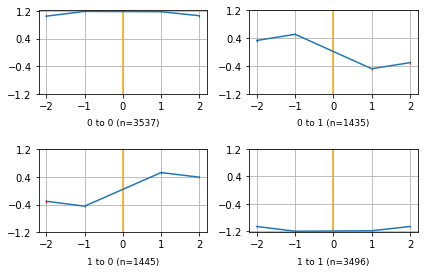

In [9]:
# You don't need to manually create an extended event study to plot it
bdf = bdf.cluster(grouping=bpd.grouping.kmeans(n_clusters=2))
bdf.plot_es_extended(periods_pre=2, periods_post=2, stable_pre=[], stable_post=[], include=['g', 'y'], transition_col='j')

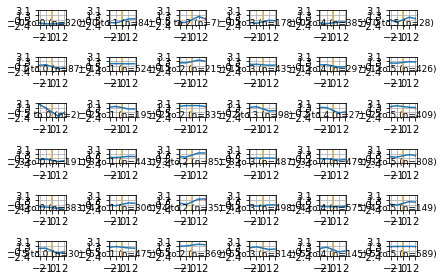

In [10]:
# Be careful about including too many clusters!
bdf = bdf.cluster(grouping=bpd.grouping.kmeans(n_clusters=6))
bdf.plot_es_extended(periods_pre=2, periods_post=2, stable_pre=[], stable_post=[], include=['g', 'y'], transition_col='j')